## Загрузка библиотек   

In [4]:
import gdown
import numpy as np
import pandas as pd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectKBest # выбор признаков
from sklearn.feature_selection import chi2 # выбор по Хи квадрат

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Загрузка данных для работы

In [5]:
file_id = '1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec' # доступ для чтения

gdown.download(id=file_id)
#https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view

Downloading...
From: https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec
To: /content/diabetes.csv
100%|██████████| 23.1k/23.1k [00:00<00:00, 34.0MB/s]


'diabetes.csv'

In [6]:
# загрузка данных
dataset_orig = pd.read_csv(r"diabetes.csv")

In [7]:
dataset_orig.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset_orig.isnull().mean() # проверка пропущенных значений
# Есть вероятность, что 0 повлияет на результат

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [ ]:
# TODO проверка на 0 значения

In [9]:
# привести наименования к нижнему регистру, пробелы к _, skinThickness -> skinthickness,
# Skin Thickness(type01) -> skin_thickness_type01
dataset_orig.columns = [col.lower() for col in dataset_orig.columns]
dataset_orig.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [10]:
# Очистим датасет от статистических выбросов
dataset = dataset_orig[((dataset_orig['pregnancies'] <=9) & (dataset_orig['glucose'] > 0) & (dataset_orig['bloodpressure'] > 0) & (dataset_orig['skinthickness'] < 99) & (dataset_orig['insulin'] <=210) & (dataset_orig['bmi'] > 0))]

In [11]:
# Разделение X (data features) и y (outcome)
# Разделение нужно для задачи классификации

X = dataset.drop(columns=['outcome'])
y = dataset['outcome']

## EDA - исследовательский анализ данных

(какие признаки, квантили/квартили, пустые ячейки, выбросы)

In [12]:
px.box(X) # построить распределение для всех числовых переменных

In [13]:
X.describe(percentiles=[0.1, 0.25,0.5, 0.75, 0.9]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
pregnancies,598.0,3.234114,2.641387,0.000,0.000,1.00000,3.0000,5.0000,7.0000,9.00
glucose,598.0,118.011706,29.277192,44.000,85.000,97.00000,112.0000,134.7500,162.0000,199.00
bloodpressure,598.0,71.675585,12.275390,24.000,57.400,64.00000,72.0000,80.0000,88.0000,122.00
skinthickness,598.0,20.056856,15.330861,0.000,0.000,0.00000,22.0000,32.0000,40.0000,63.00
insulin,598.0,54.998328,65.579660,0.000,0.000,0.00000,7.0000,105.0000,161.5000,210.00
bmi,598.0,31.923411,6.784542,18.200,23.740,27.02500,31.6000,35.8000,40.2900,67.10
diabetespedigreefunction,598.0,0.464221,0.319860,0.078,0.164,0.24325,0.3705,0.6065,0.8682,2.42
age,598.0,32.289298,11.508860,21.000,22.000,24.00000,28.0000,38.0000,50.0000,81.00


## Подготовка данных

In [14]:
# нормализация
# MinMax
# StandardScalar
# Robust
scalar_test = StandardScaler()
features_arr = scalar_test.fit_transform(X, y)
print(features_arr)
normalised_X = pd.DataFrame(features_arr, columns=X.columns)
print(normalised_X)

[[ 1.04801073  1.02514612  0.02645018 ...  0.24732581  0.50933371
   1.54016379]
 [-0.84651894 -1.12850106 -0.46274185 ... -0.78529521 -0.35426587
  -0.11212032]
 [ 1.8058226   2.22161677 -0.62580587 ... -1.27210226  0.65013798
  -0.025158  ]
 ...
 [ 0.66910479  0.10215447  0.02645018 ... -0.84430213 -0.68593816
  -0.19908264]
 [-0.84651894  0.27307885 -0.95193389 ... -0.2689847  -0.36052383
   1.27927683]
 [-0.84651894 -0.85502205 -0.13661383 ... -0.22472951 -0.46690929
  -0.80781889]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0       1.048011  1.025146       0.026450       0.975526 -0.839351  0.247326   
1      -0.846519 -1.128501      -0.462742       0.583831 -0.839351 -0.785295   
2       1.805823  2.221617      -0.625806      -1.309362 -0.839351 -1.272102   
3      -0.846519 -0.991762      -0.462742       0.192136  0.595220 -0.564019   
4      -1.225425  0.649112      -2.582574       0.975526  1.724563  1.648740   
..           ...       ...  

In [15]:
px.box(normalised_X)

In [16]:
minmax_test = MinMaxScaler()
features_arr_min_max = minmax_test.fit_transform(X, y) # результат np array
print(features_arr_min_max)
normalised_min_max_X = pd.DataFrame(features_arr_min_max, columns=X.columns)
print(normalised_min_max_X)

[[0.66666667 0.67096774 0.48979592 ... 0.31492843 0.23441503 0.48333333]
 [0.11111111 0.26451613 0.42857143 ... 0.17177914 0.11656704 0.16666667]
 [0.88888889 0.89677419 0.40816327 ... 0.10429448 0.25362938 0.18333333]
 ...
 [0.55555556 0.49677419 0.48979592 ... 0.16359918 0.07130658 0.15      ]
 [0.11111111 0.52903226 0.36734694 ... 0.24335378 0.11571307 0.43333333]
 [0.11111111 0.31612903 0.46938776 ... 0.24948875 0.10119556 0.03333333]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0       0.666667  0.670968       0.489796       0.555556  0.000000  0.314928   
1       0.111111  0.264516       0.428571       0.460317  0.000000  0.171779   
2       0.888889  0.896774       0.408163       0.000000  0.000000  0.104294   
3       0.111111  0.290323       0.428571       0.365079  0.447619  0.202454   
4       0.000000  0.600000       0.163265       0.555556  0.800000  0.509202   
..           ...       ...            ...            ...       ...       ...

In [17]:
px.box(normalised_min_max_X)

In [18]:
robust_test = RobustScaler()
features_arr_robust = robust_test.fit_transform(X, y) # результат np array
print(features_arr_robust)
normalised_robust_X = pd.DataFrame(features_arr_robust, columns=X.columns)
print(normalised_robust_X)

[[ 0.75        0.95364238  0.         ...  0.22792023  0.70612526
   1.57142857]
 [-0.5        -0.71523179 -0.375      ... -0.56980057 -0.05368204
   0.21428571]
 [ 1.25        1.8807947  -0.5        ... -0.94586895  0.83000688
   0.28571429]
 ...
 [ 0.5         0.2384106   0.         ... -0.61538462 -0.34549209
   0.14285714]
 [-0.5         0.37086093 -0.75       ... -0.17094017 -0.05918789
   1.35714286]
 [-0.5        -0.50331126 -0.125      ... -0.13675214 -0.15278734
  -0.35714286]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0           0.75  0.953642          0.000        0.40625 -0.066667  0.227920   
1          -0.50 -0.715232         -0.375        0.21875 -0.066667 -0.569801   
2           1.25  1.880795         -0.500       -0.68750 -0.066667 -0.945869   
3          -0.50 -0.609272         -0.375        0.03125  0.828571 -0.398860   
4          -0.75  0.662252         -2.000        0.40625  1.533333  1.310541   
..           ...       ...  

In [19]:
px.box(normalised_robust_X)

In [20]:
TEST_SIZE_DEFAULT = 0.2
TEST_SIZE = 0.25
RANDOM_SEED = 1234
NEED_SHUFFLE = True
# Разделение на тренировочную и тестовую для классификации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_DEFAULT, random_state=RANDOM_SEED, shuffle=NEED_SHUFFLE)
# Разделение для сравнения
X_train25, X_test25, y_train25, y_test25 = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED, shuffle=NEED_SHUFFLE)

## Работа с KNN

In [21]:
def knn_classifier_wrapper(x_train, y_train, k, knn_model, cv=5):
    knn_model.set_params(n_neighbors=k)
    return knn_model, cross_val_score(knn_model, x_train, y_train)

In [22]:
# Примените алгоритм KNN (k-ближайших соседей) для данных

# Построение модели k-Nearest Neighbors (kNN), загрузить классификатор
knn_model = KNeighborsClassifier()

In [23]:
# Рассчитайте модель kNN для k = 5, 10, 15, 20, 25.
MODEL_PARAMS = {'n_neighbors': np.arange(5, 26, 5)}
print(MODEL_PARAMS)

best_score = 0
best_model = 0

for k in MODEL_PARAMS['n_neighbors']:
    knn_set_model, scores = knn_classifier_wrapper(X_train, y_train, k, knn_model)
    print(f"k: {k}, по scores - {scores}")
    avg_score = np.mean(scores)
    if avg_score > best_score:
        best_score = avg_score
        best_n_neighbors = k
        best_model = knn_set_model

print(f"Лучший k по scores - {best_n_neighbors}")

{'n_neighbors': array([ 5, 10, 15, 20, 25])}
k: 5, по scores - [0.6875     0.75       0.79166667 0.76842105 0.75789474]
k: 10, по scores - [0.75       0.77083333 0.78125    0.77894737 0.78947368]
k: 15, по scores - [0.75       0.77083333 0.8125     0.72631579 0.75789474]
k: 20, по scores - [0.76041667 0.78125    0.77083333 0.75789474 0.72631579]
k: 25, по scores - [0.73958333 0.78125    0.80208333 0.73684211 0.73684211]
Лучший k по scores - 10


In [24]:
# c выбором лучших ячеек
# Выбор лучших признаков
selector = SelectKBest(chi2, k=2)
X_best25_2 = selector.fit_transform(X_train25, y_train25)
X_best25_2_df = pd.DataFrame(X_best25_2)

In [25]:
# Укажите объем тестового набора данных равным 25% от общего количества данных

# Рассчитайте модель kNN для k = 5, 10, 15, 20, 25.
MODEL_PARAMS = {'n_neighbors': np.arange(5, 26, 5)}
print(MODEL_PARAMS)

best_score25 = 0

for k in MODEL_PARAMS['n_neighbors']:
    knn_set_model25, scores = knn_classifier_wrapper(X_best25_2_df, y_train25, k, knn_model)
    print(f"k: {k}, по scores - {scores}")
    avg_score = np.mean(scores)
    if avg_score > best_score:
        best_score25 = avg_score
        best_n_neighbors25 = k
        best_model25 = knn_set_model25 # доделать для лучшей

print(f"Лучший k по scores - {best_n_neighbors}")

{'n_neighbors': array([ 5, 10, 15, 20, 25])}
k: 5, по scores - [0.72222222 0.78888889 0.84444444 0.75280899 0.74157303]
k: 10, по scores - [0.72222222 0.77777778 0.77777778 0.79775281 0.76404494]
k: 15, по scores - [0.71111111 0.83333333 0.8        0.78651685 0.74157303]
k: 20, по scores - [0.72222222 0.82222222 0.8        0.7752809  0.73033708]
k: 25, по scores - [0.75555556 0.8        0.78888889 0.7752809  0.7752809 ]
Лучший k по scores - 10


In [26]:
X_train25.to_numpy()

array([[4.00e+00, 1.23e+02, 6.20e+01, ..., 3.20e+01, 2.26e-01, 3.50e+01],
       [4.00e+00, 1.31e+02, 6.80e+01, ..., 3.31e+01, 1.60e-01, 2.80e+01],
       [2.00e+00, 1.18e+02, 8.00e+01, ..., 4.29e+01, 6.93e-01, 2.10e+01],
       ...,
       [3.00e+00, 1.91e+02, 6.80e+01, ..., 3.09e+01, 2.99e-01, 3.40e+01],
       [5.00e+00, 9.50e+01, 7.20e+01, ..., 3.77e+01, 3.70e-01, 2.70e+01],
       [1.00e+00, 1.09e+02, 6.00e+01, ..., 2.54e+01, 9.47e-01, 2.10e+01]])

In [27]:
from matplotlib.colors import ListedColormap

def visualize_knn_classification(model, X, y):

  # Define grid boundaries
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  # Create a grid of points
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))


  # Get predictions for each point in the grid
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure()

  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


  # Plot the contours
  plt.contourf(xx, yy, Z, cmap=cmap_light)

  # Plot the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel('Признак 1')
  plt.ylabel('Признак 2')
  plt.title(f'Результат классификации ({type(model).__name__})')
  plt.show()

In [30]:
knn_best_model25, scores = knn_classifier_wrapper(X_best25_2_df, y_train25, 10, knn_model)
knn_best_model25.fit(X_best25_2, y_train25.to_numpy())

KNeighborsClassifier(n_neighbors=10)

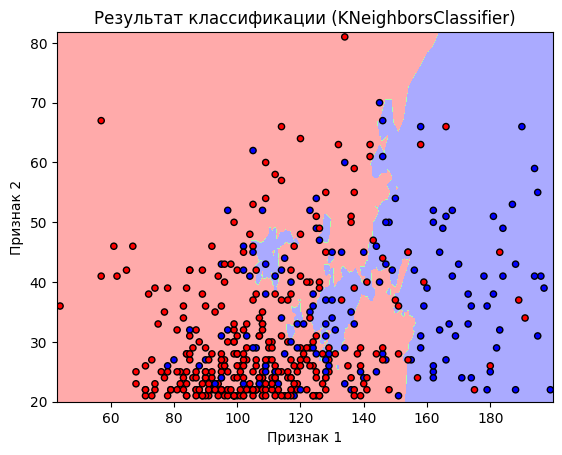

In [31]:
visualize_knn_classification(knn_best_model25, X_best25_2, y_train25.to_numpy())

In [58]:
# Укажите score модели (метрики) и постройте визуализацию обученной классификации для указанных k

def model_report(model, X_test, y_test, average='weighted'):
    # Проведите тестирование модели
    # Делаем предсказания на тестовом наборе
    y_pred = model.predict(X_test)

    # Оцениваем точность модели
    accuracy_eff = accuracy_score(y_test, y_pred)
    print(f"Правильность (accuracy) модели: {accuracy_eff}")

    precision_eff = precision_score(y_test, y_pred, average=average)
    print(f"Точность (precision) модели: {precision_eff}")

    recall_eff = recall_score(y_test, y_pred, average=average)
    print(f"Полнота (recall) модели: {recall_eff}")

    f1_eff = f1_score(y_test, y_pred, average=average)
    print(f"F1 мера модели: {f1_eff}")


In [59]:
knn_model_scores = KNeighborsClassifier()
knn_best_20, scores_20 = knn_classifier_wrapper(X_train, y_train, 10, knn_model_scores)

In [60]:
knn_best_20.fit(X_test, y_test)
# получим отчет для knn k=10, test 20%
model_report(knn_best_20, X_test, y_test)

Правильность (accuracy) модели: 0.7916666666666666
Точность (precision) модели: 0.7975442604226156
Полнота (recall) модели: 0.7916666666666666
F1 мера модели: 0.764907678337201


In [61]:
knn_model_scores_25 = KNeighborsClassifier()
knn_best_25, scores_25 = knn_classifier_wrapper(X_train25, y_train25, 15, knn_model_scores_25)

In [62]:
knn_best_25.fit(X_test25, y_test25)
# получим отчет для knn k=15, test 25%
model_report(knn_best_25, X_test25, y_test25)

Правильность (accuracy) модели: 0.74
Точность (precision) модели: 0.7248888888888889
Полнота (recall) модели: 0.74
F1 мера модели: 0.7212090152000467


## Работа с множественной линейной регрессией

### Подготовка к решению задачи

In [32]:
# {SkinThickness, BMI} и Y = {Insulin} из датасета

X_regr = dataset[['skinthickness', 'bmi']]
y_regr = dataset['insulin']

<Axes: xlabel='skinthickness', ylabel='insulin'>

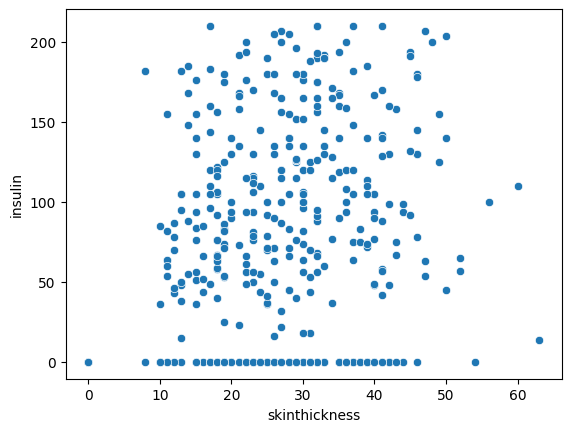

In [33]:
sns.scatterplot(x=dataset['skinthickness'], y=dataset['insulin'])


<Axes: xlabel='bmi', ylabel='insulin'>

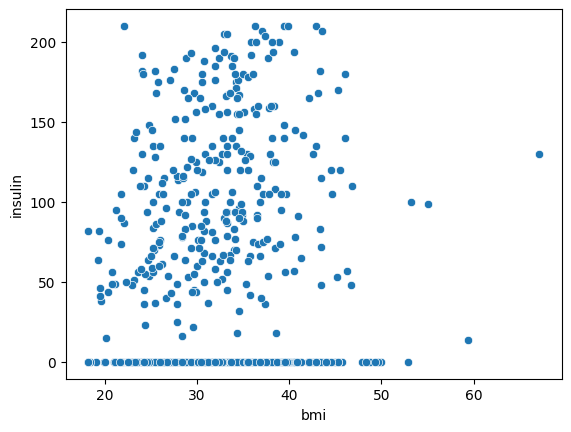

In [34]:
sns.scatterplot(x=dataset['bmi'], y=dataset['insulin'])

<ipython-input-35-26a15d12bdd9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='mean', ylabel='insulin'>

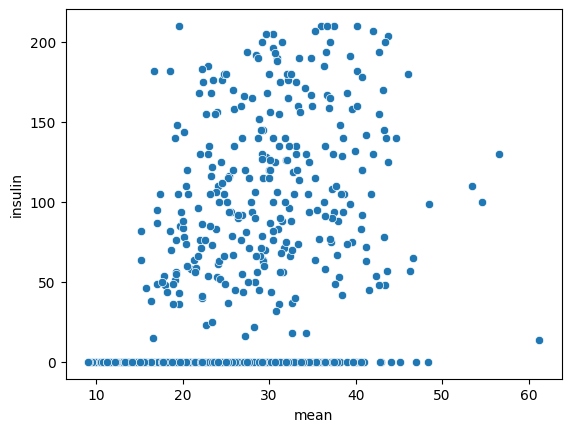

In [35]:
dataset['mean'] = (dataset['bmi'] + dataset['skinthickness'])/2
sns.scatterplot(x=dataset['mean'], y=dataset['insulin'])

In [36]:
X_regr

,skinthickness,bmi
0,35,33.6
1,29,26.6
2,0,23.3
3,23,28.1
4,35,43.1
...,...,...
762,0,22.5
764,27,36.8
765,23,26.2
766,0,30.1


In [37]:
# разбиваем dataset на test / train
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_regr, y_regr, test_size = TEST_SIZE, random_state = RANDOM_SEED)

In [38]:
model_regr = LinearRegression()
model_regr.fit(X_train_r, y_train_r)

LinearRegression()

In [39]:
X_train_r.dtypes

skinthickness      int64
bmi              float64
dtype: object

In [40]:
# получаем метрику качества модели на test выборке
model_regr.score(X_train_r, y_train_r)

0.21606670583488952

In [41]:
# запускаем прогноз значений целевой функции y от x
y_pred = model_regr.predict(X_test_r)

In [42]:
# выводим предсказанное , реальное значение в тестовой выборке и разницу между ними
d = {'y_pred': y_pred, 'y_test': y_test_r, 'diff': np.abs(y_test_r - y_pred)}
pd.DataFrame(d)

,y_pred,y_test,diff
588,66.679991,156,89.320009
543,54.161078,56,1.838922
586,10.304540,0,10.304540
94,54.270663,64,9.729337
90,21.345780,0,21.345780
...,...,...,...
224,48.899651,56,7.100349
506,62.397222,90,27.602778
474,14.497416,0,14.497416
212,74.237334,0,74.237334


In [47]:
# Получаем R2, MSE, коэффициенты
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test_r, y_pred)
mse = mean_squared_error(y_test_r, y_pred)

b = model_regr.intercept_
a1, a2 = model_regr.coef_

print("Коэффициенты модели:")

print("b (пересечение):", b)

print("a1 (коэффициент для skinthickness):", a1)

print("a2 (коэффициент для bmi):", a2)


print("R^2 (коэффициент детерминации):", r2)
print("MSE (среднеквадратичная ошибка):", mse)



Коэффициенты модели:
b (пересечение): 34.69310116317245
a1 (коэффициент для skinthickness): 2.0465685503455675
a2 (коэффициент для bmi): -0.6988126466994559
R^2 (коэффициент детерминации): 0.29317931359314353
MSE (среднеквадратичная ошибка): 3452.545246470707


## Работа с Алгоритмом 3 (например, DecisionTreeClassifier)

In [51]:
# Попробуем применить к предыдущей задаче DecisionTreeClassifier т.к. множественная регрессия показала слабый результат
# {SkinThickness, BMI} и Y = {Insulin} из датасета
from sklearn.tree import DecisionTreeRegressor

X_dt = dataset[['skinthickness', 'bmi']]
Y_dt = dataset['insulin']


In [52]:
# Разбиваем на тестовые и обучающие сеты
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y_dt, test_size = TEST_SIZE, random_state = RANDOM_SEED)

In [53]:
# Обучаем модель
model_dt = DecisionTreeRegressor()
model_dt.fit(X_dt, Y_dt)

DecisionTreeRegressor()

In [54]:
# запускаем прогноз значений целевой функции y от x
y_pred_dt = model_dt.predict(X_test_dt)

In [55]:
# выводим предсказанное , реальное значение в тестовой выборке и разницу между ними
d = {'y_pred': y_pred_dt, 'y_test': Y_test_dt, 'diff': np.abs(Y_test_dt - y_pred_dt)}
pd.DataFrame(d)

,y_pred,y_test,diff
588,156.0,156,0.0
543,56.0,56,0.0
586,0.0,0,0.0
94,64.0,64,0.0
90,0.0,0,0.0
...,...,...,...
224,56.0,56,0.0
506,90.0,90,0.0
474,0.0,0,0.0
212,35.0,0,35.0


In [56]:
# Оцениваем качество модели
r2 = r2_score(Y_test_dt, y_pred_dt)
mse = mean_squared_error(Y_test_dt, y_pred_dt)

print("R^2 (коэффициент детерминации):", r2)
print("MSE (среднеквадратичная ошибка):", mse)

R^2 (коэффициент детерминации): 0.9737355494511454
MSE (среднеквадратичная ошибка): 128.29166666666666


In [ ]:
# Модель показывает отличный результат для данной задачи